In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
m0 = pd.read_json("spotify_data/StreamingHistory_music_0.json")
m1 = pd.read_json("spotify_data/StreamingHistory_music_1.json")

df = pd.concat([m0,m1])
df['date'] = pd.to_datetime(df.endTime)

df['secondsPlayed'] = df['msPlayed']*0.001
df['minsPlayed']    = df['secondsPlayed']/60
df['hoursPlayed']   = df['minsPlayed']/60


artists_by_month = df.groupby([df['artistName'],
                   df["date"].dt.year.rename('year'), 
                   df["date"].dt.month.rename('month')]).sum('minsPlayed').reset_index()

artists_by_month['yearmonth'] = artists_by_month['year'].astype(str) + '-' + artists_by_month['month'].astype(str)
artists_by_month['yearmonth'] = artists_by_month['yearmonth'].replace({
    '2024-1':'2024-01',
    '2024-2':'2024-02',
    '2024-3':'2024-03',
    '2024-4':'2024-04',
    '2024-5':'2024-05',
    '2024-6':'2024-06',
    '2024-7':'2024-07',
    '2024-8':'2024-08',
    '2023-9':'2023-09',
    '2023-8':'2023-08',
    '2023-7':'2023-07',
    '2023-6':'2023-06',
    '2023-5':'2023-05',
    '2023-4':'2023-04',
    '2023-3':'2023-03'
})

artists_by_weekday = df.groupby([df['artistName'],
                                 df["date"].dt.day_name().rename('weekday')]).sum('minsPlayed').reset_index()

artists_by_hour = df.groupby([df['artistName'],
                              df["date"].dt.hour.rename('hour')]).sum('minsPlayed').reset_index()

In [32]:
artists_by_month.to_parquet('artist_played_by_month.p')
artists_by_weekday.to_parquet('artist_played_by_weekday.p')
artists_by_hour.to_parquet('artist_played_by_hour.p')

<AxesSubplot: xlabel='date,date'>

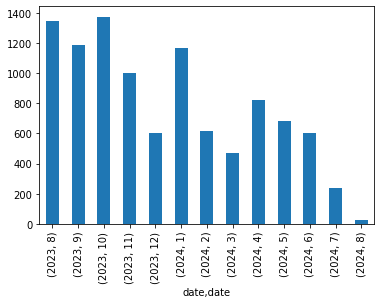

In [3]:
df['date'].groupby([df["date"].dt.year, df["date"].dt.month]).count().plot(kind="bar")

<AxesSubplot: xlabel='date'>

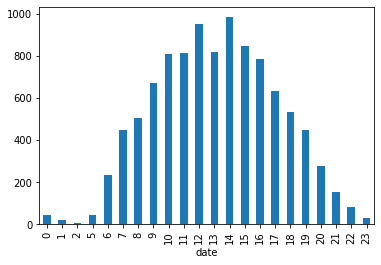

In [4]:
df['date'].groupby([df["date"].dt.hour]).count().plot(kind="bar")

<AxesSubplot: xlabel='date'>

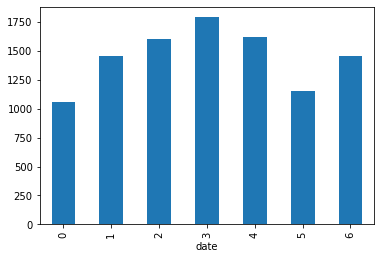

In [34]:
df['date'].groupby([df["date"].dt.dayofweek]).count().plot(kind="bar")

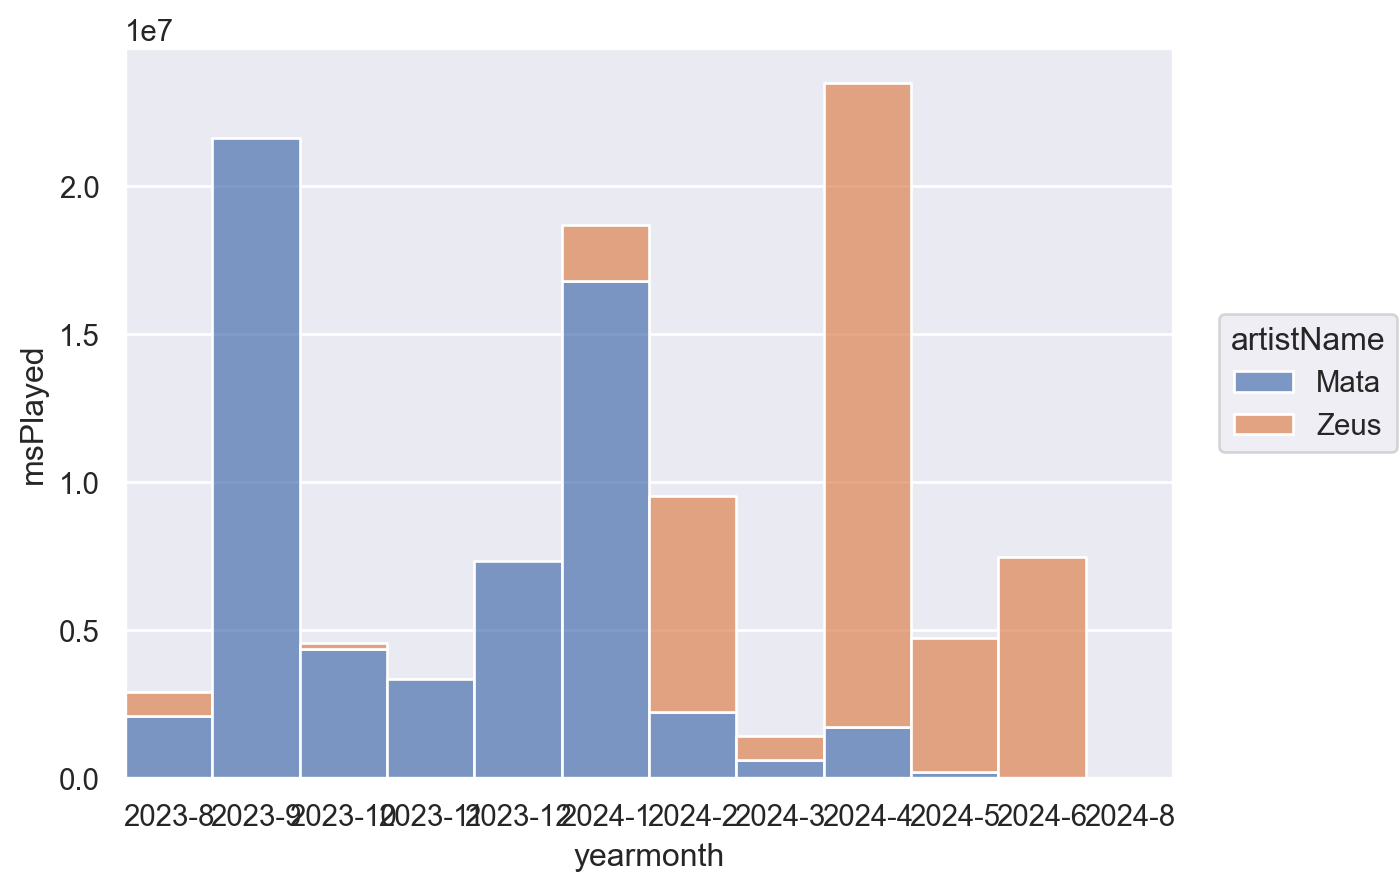

In [142]:
import seaborn.objects as so
(
    so.Plot(artists[artists['artistName'].isin(['Mata', 'Zeus', 'tede'])], x="yearmonth", y="msPlayed", color='artistName')
    .add(so.Bars(), so.Stack())
)